# ReneWind

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.). 



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost. 
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models. 
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

## Importing libraries

In [1]:
# This will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)
from sklearn import metrics

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To suppress warnings
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

## Loading Data

In [2]:
df = pd.read_csv("Train.csv")  ##  Complete the code to read the data
df_test = pd.read_csv("Test.csv")  ##  Complete the code to read the data

<IPython.core.display.Javascript object>

In [3]:
# Checking the number of rows and columns in the data
df.shape

(20000, 41)

<IPython.core.display.Javascript object>

In [4]:
# Checking the number of rows and columns in the data
df_test.shape

(5000, 41)

<IPython.core.display.Javascript object>

## EDA

In [5]:
# let's check the data types of the columns in the training dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

<IPython.core.display.Javascript object>

In [6]:
# let's check the data types of the columns in the test dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      4995 non-null   float64
 1   V2      4994 non-null   float64
 2   V3      5000 non-null   float64
 3   V4      5000 non-null   float64
 4   V5      5000 non-null   float64
 5   V6      5000 non-null   float64
 6   V7      5000 non-null   float64
 7   V8      5000 non-null   float64
 8   V9      5000 non-null   float64
 9   V10     5000 non-null   float64
 10  V11     5000 non-null   float64
 11  V12     5000 non-null   float64
 12  V13     5000 non-null   float64
 13  V14     5000 non-null   float64
 14  V15     5000 non-null   float64
 15  V16     5000 non-null   float64
 16  V17     5000 non-null   float64
 17  V18     5000 non-null   float64
 18  V19     5000 non-null   float64
 19  V20     5000 non-null   float64
 20  V21     5000 non-null   float64
 21  V22     5000 non-null   float64
 22  

<IPython.core.display.Javascript object>

## Data Overview

In [7]:
# let's create a copy of the training data
data = df.copy()

<IPython.core.display.Javascript object>

In [8]:
# let's create a copy of the training data
data_test = df_test.copy()

<IPython.core.display.Javascript object>

In [9]:
# let's view the first 5 rows of the data
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.465,-4.679,3.102,0.506,-0.221,-2.033,-2.911,0.051,-1.522,3.762,-5.715,0.736,0.981,1.418,-3.376,-3.047,0.306,2.914,2.270,4.395,-2.388,0.646,-1.191,3.133,0.665,-2.511,-0.037,0.726,-3.982,-1.073,1.667,3.060,-1.690,2.846,2.235,6.667,0.444,-2.369,2.951,-3.480,0
1,3.366,3.653,0.910,-1.368,0.332,2.359,0.733,-4.332,0.566,-0.101,1.914,-0.951,-1.255,-2.707,0.193,-4.769,-2.205,0.908,0.757,-5.834,-3.065,1.597,-1.757,1.766,-0.267,3.625,1.500,-0.586,0.783,-0.201,0.025,-1.795,3.033,-2.468,1.895,-2.298,-1.731,5.909,-0.386,0.616,0
2,-3.832,-5.824,0.634,-2.419,-1.774,1.017,-2.099,-3.173,-2.082,5.393,-0.771,1.107,1.144,0.943,-3.164,-4.248,-4.039,3.689,3.311,1.059,-2.143,1.650,-1.661,1.680,-0.451,-4.551,3.739,1.134,-2.034,0.841,-1.600,-0.257,0.804,4.086,2.292,5.361,0.352,2.940,3.839,-4.309,0
3,1.618,1.888,7.046,-1.147,0.083,-1.530,0.207,-2.494,0.345,2.119,-3.053,0.460,2.705,-0.636,-0.454,-3.174,-3.404,-1.282,1.582,-1.952,-3.517,-1.206,-5.628,-1.818,2.124,5.295,4.748,-2.309,-3.963,-6.029,4.949,-3.584,-2.577,1.364,0.623,5.550,-1.527,0.139,3.101,-1.277,0
4,-0.111,3.872,-3.758,-2.983,3.793,0.545,0.205,4.849,-1.855,-6.220,1.998,4.724,0.709,-1.989,-2.633,4.184,2.245,3.734,-6.313,-5.380,-0.887,2.062,9.446,4.490,-3.945,4.582,-8.780,-3.383,5.107,6.788,2.044,8.266,6.629,-10.069,1.223,-3.230,1.687,-2.164,-3.645,6.510,0


<IPython.core.display.Javascript object>

In [10]:
# let's view the last 5 rows of the data
data.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
19995,-2.071,-1.088,-0.796,-3.012,-2.288,2.807,0.481,0.105,-0.587,-2.899,8.868,1.717,1.358,-1.777,0.710,4.945,-3.100,-1.199,-1.085,-0.365,3.131,-3.948,-3.578,-8.139,-1.937,-1.328,-0.403,-1.735,9.996,6.955,-3.938,-8.274,5.745,0.589,-0.650,-3.043,2.216,0.609,0.178,2.928,1
19996,2.890,2.483,5.644,0.937,-1.381,0.412,-1.593,-5.762,2.150,0.272,-2.095,-1.526,0.072,-3.540,-2.762,-10.632,-0.495,1.720,3.872,-1.210,-8.222,2.121,-5.492,1.452,1.450,3.685,1.077,-0.384,-0.839,-0.748,-1.089,-4.159,1.181,-0.742,5.369,-0.693,-1.669,3.660,0.820,-1.987,0
19997,-3.897,-3.942,-0.351,-2.417,1.108,-1.528,-3.520,2.055,-0.234,-0.358,-3.782,2.180,6.112,1.985,-8.330,-1.639,-0.915,5.672,-3.924,2.133,-4.502,2.777,5.728,1.620,-1.700,-0.042,-2.923,-2.760,-2.254,2.552,0.982,7.112,1.476,-3.954,1.856,5.029,2.083,-6.409,1.477,-0.874,0
19998,-3.187,-10.052,5.696,-4.370,-5.355,-1.873,-3.947,0.679,-2.389,5.457,1.583,3.571,9.227,2.554,-7.039,-0.994,-9.665,1.155,3.877,3.524,-7.015,-0.132,-3.446,-4.801,-0.876,-3.812,5.422,-3.732,0.609,5.256,1.915,0.403,3.164,3.752,8.530,8.451,0.204,-7.130,4.249,-6.112,0
19999,-2.687,1.961,6.137,2.600,2.657,-4.291,-2.344,0.974,-1.027,0.497,-9.589,3.177,1.055,-1.416,-4.669,-5.405,3.720,2.893,2.329,1.458,-6.429,1.818,0.806,7.786,0.331,5.257,-4.867,-0.819,-5.667,-2.861,4.674,6.621,-1.989,-1.349,3.952,5.450,-0.455,-2.202,1.678,-1.974,0


<IPython.core.display.Javascript object>

In [11]:
# let's view the statistical summary of the numerical columns in the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,19982.000,-0.272,3.442,-11.876,-2.737,-0.748,1.840,15.493
V2,19982.000,0.440,3.151,-12.320,-1.641,0.472,2.544,13.089
V3,20000.000,2.485,3.389,-10.708,0.207,2.256,4.566,17.091
V4,20000.000,-0.083,3.432,-15.082,-2.348,-0.135,2.131,13.236
V5,20000.000,-0.054,2.105,-8.603,-1.536,-0.102,1.340,8.134
V6,20000.000,-0.995,2.041,-10.227,-2.347,-1.001,0.380,6.976
V7,20000.000,-0.879,1.762,-7.950,-2.031,-0.917,0.224,8.006
V8,20000.000,-0.548,3.296,-15.658,-2.643,-0.389,1.723,11.679
V9,20000.000,-0.017,2.161,-8.596,-1.495,-0.068,1.409,8.138
V10,20000.000,-0.013,2.193,-9.854,-1.411,0.101,1.477,8.108


<IPython.core.display.Javascript object>

**Observations:**
- All columnns have 20000 values except V1 and V2, that suggests there are missing values present in these two columns, further analysis will be performed later in the program
- ts Year_Birth` has a large range of values i.e. 1893 to 1996. 
- The birth year <=1900 is some users, while the year of campaign we are considering is 2016. It's very unlikely that the person is alive. It may be a reporting error. We will explore this further.
- Income has a max value of 666666 which is far greater than the mean and could be an outlier.
- Columns - `Income, MntFruits, MntWines, MntMeatProducts, MntFishProducts, MntSweetProducts` might have outliers on the right end as there is a large difference between 75th percentile and maximum values.
- Recency has an approx equal mean and median which is equal to 49 days.
- Highest mean amount spent per customer in the last two years is on wines (approx 304), followed by meat products (approx 167).

Company should closely monitor V3 and V18 sensors as these are the most important variables followed by next three variables V39, V15 amd V3 in predecting the failures.

In [12]:
# let's check for duplicate values in the data
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [13]:
# let's check for missing values in the data
#data.isnull().sum()
round(data.isnull().sum() / data.isnull().count() * 100, 2)


V1       0.090
V2       0.090
V3       0.000
V4       0.000
V5       0.000
V6       0.000
V7       0.000
V8       0.000
V9       0.000
V10      0.000
V11      0.000
V12      0.000
V13      0.000
V14      0.000
V15      0.000
V16      0.000
V17      0.000
V18      0.000
V19      0.000
V20      0.000
V21      0.000
V22      0.000
V23      0.000
V24      0.000
V25      0.000
V26      0.000
V27      0.000
V28      0.000
V29      0.000
V30      0.000
V31      0.000
V32      0.000
V33      0.000
V34      0.000
V35      0.000
V36      0.000
V37      0.000
V38      0.000
V39      0.000
V40      0.000
Target   0.000
dtype: float64

<IPython.core.display.Javascript object>

### Observations
In the train data, V1 and V2 columns have 0.09% missing values out the the tolal observations

In [14]:
# let's check for missing values in the data
#data_test.isnull().sum()
round(data_test.isnull().sum() / data_test.isnull().count() * 100, 2)


V1       0.100
V2       0.120
V3       0.000
V4       0.000
V5       0.000
V6       0.000
V7       0.000
V8       0.000
V9       0.000
V10      0.000
V11      0.000
V12      0.000
V13      0.000
V14      0.000
V15      0.000
V16      0.000
V17      0.000
V18      0.000
V19      0.000
V20      0.000
V21      0.000
V22      0.000
V23      0.000
V24      0.000
V25      0.000
V26      0.000
V27      0.000
V28      0.000
V29      0.000
V30      0.000
V31      0.000
V32      0.000
V33      0.000
V34      0.000
V35      0.000
V36      0.000
V37      0.000
V38      0.000
V39      0.000
V40      0.000
Target   0.000
dtype: float64

<IPython.core.display.Javascript object>

## Observations
In test data, V1 column has 0.10% missing values and V2 column has 0.12% missing values out the the tolal observations

In [15]:
# defining a list with names of columns that will be used for imputation
reqd_col_for_impute = [
    "V1",
    "V2",
]

<IPython.core.display.Javascript object>

In [16]:
data[reqd_col_for_impute].head()

,V1,V2
0,-4.465,-4.679
1,3.366,3.653
2,-3.832,-5.824
3,1.618,1.888
4,-0.111,3.872


<IPython.core.display.Javascript object>

In [17]:
data_test[reqd_col_for_impute].head()

,V1,V2
0,-0.613,-3.820
1,0.390,-0.512
2,-0.875,-0.641
3,0.238,1.459
4,5.828,2.768


<IPython.core.display.Javascript object>

### Plotting histograms and boxplots for all the variables

In [18]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

### Plotting all the features at one go

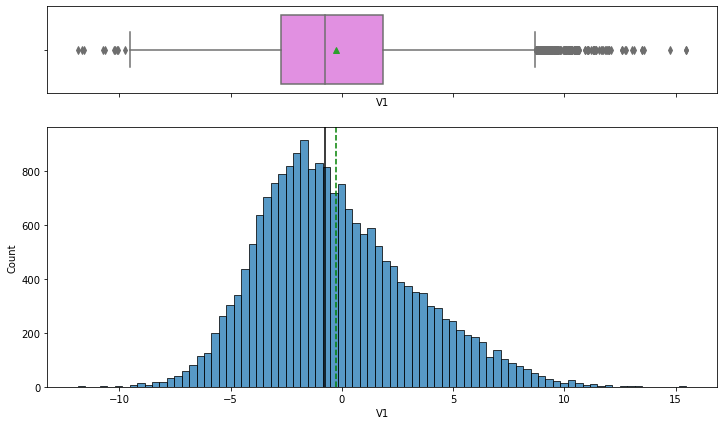

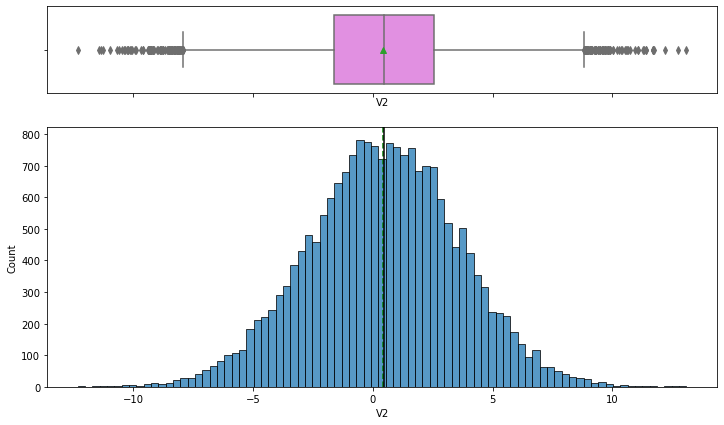

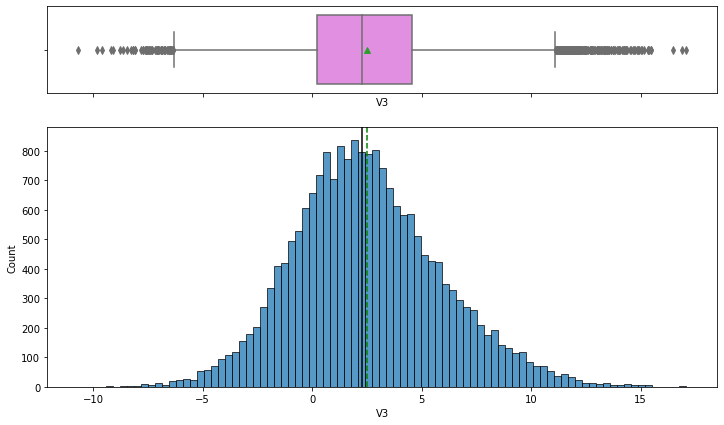

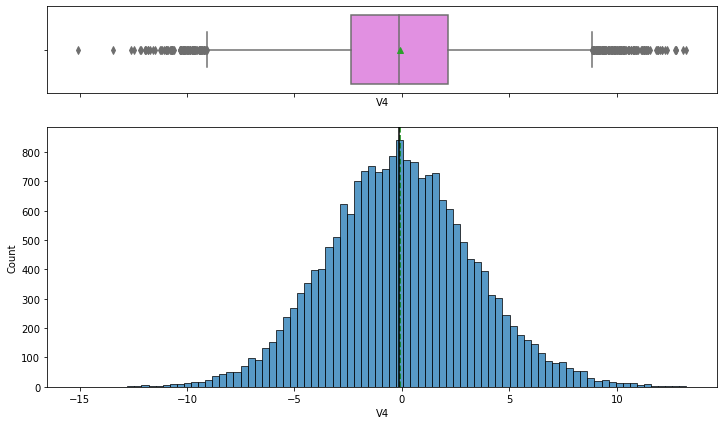

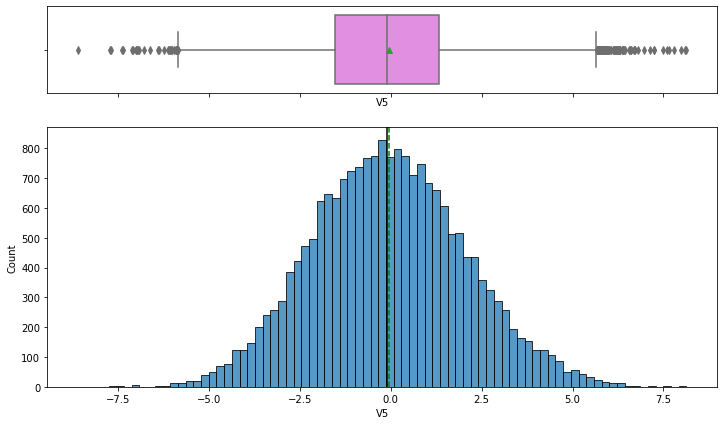

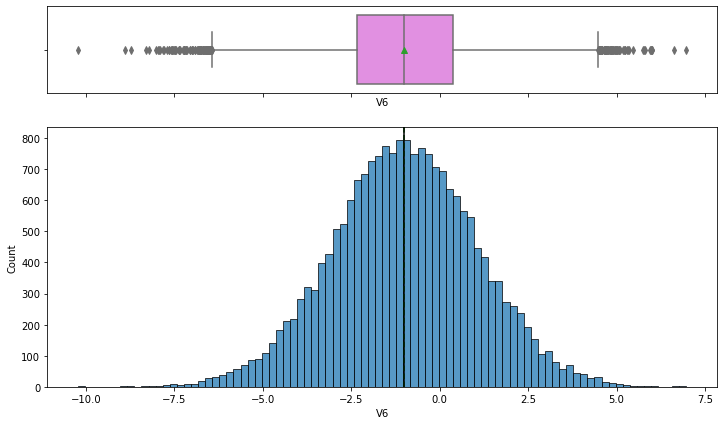

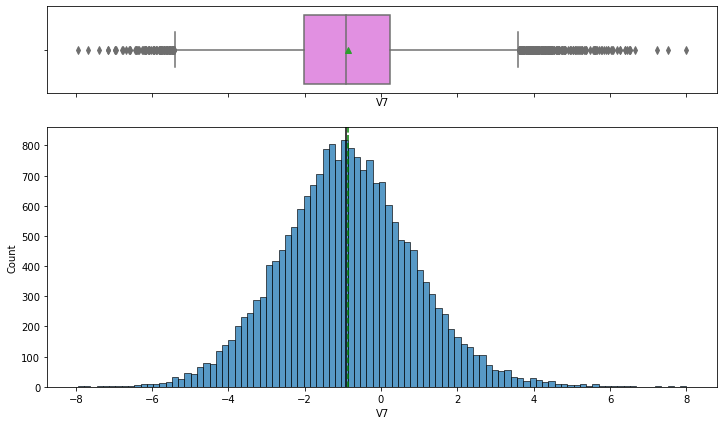

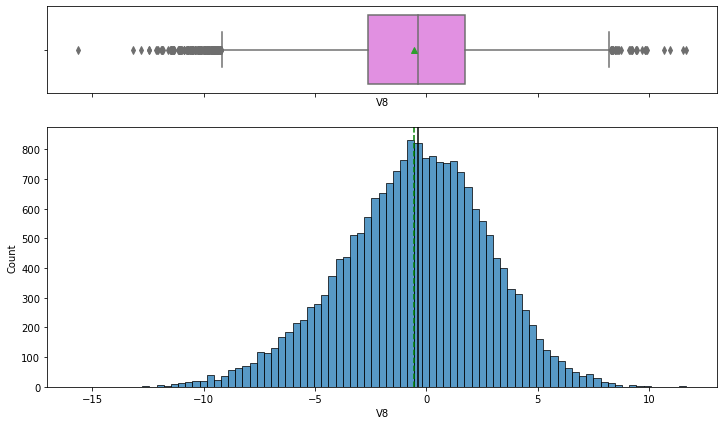

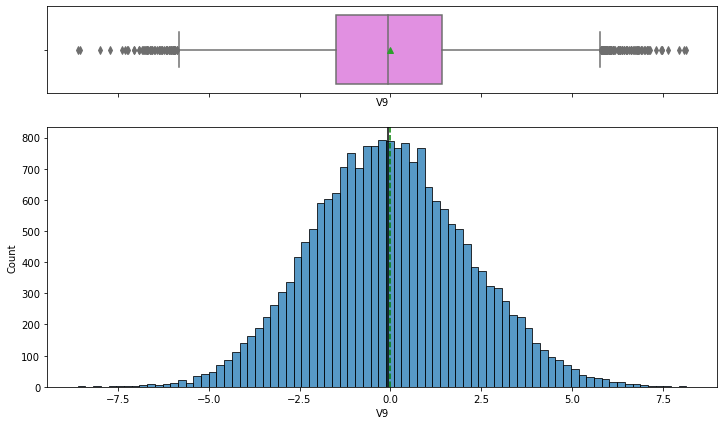

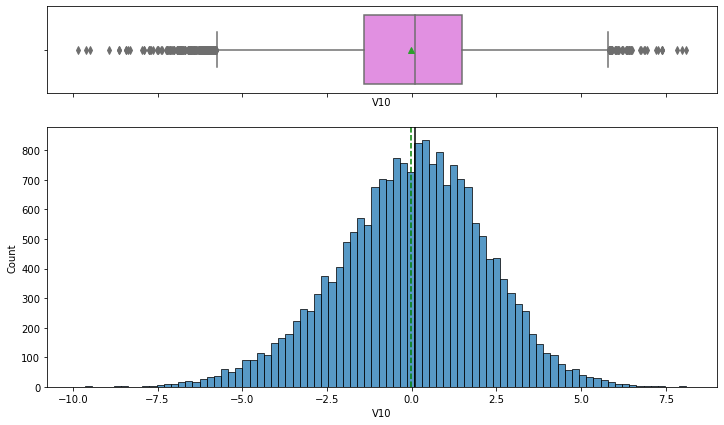

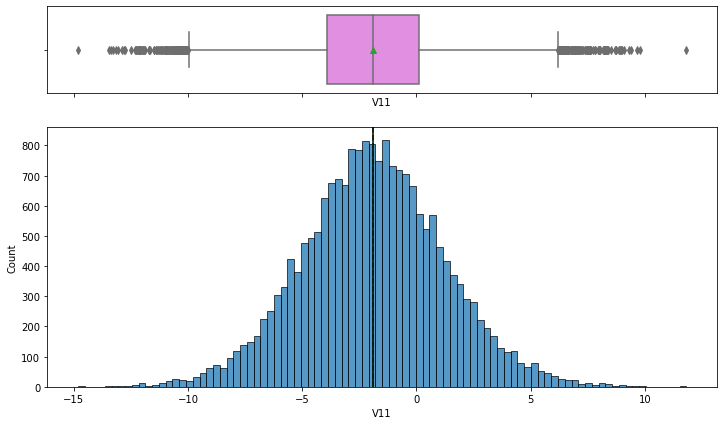

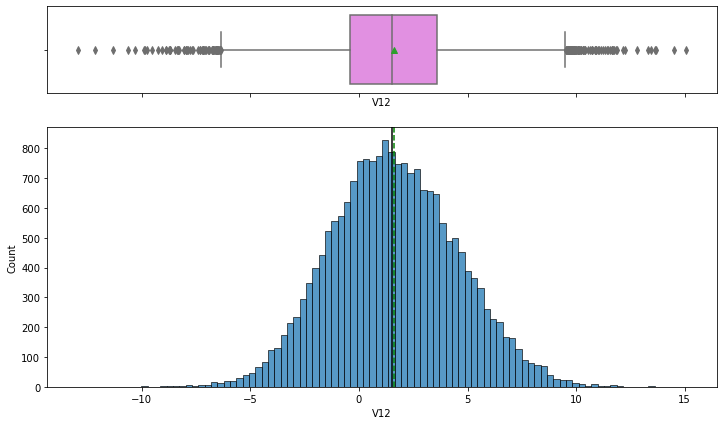

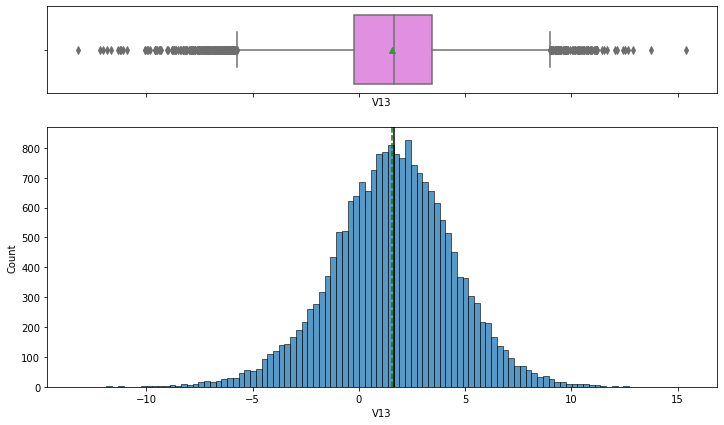

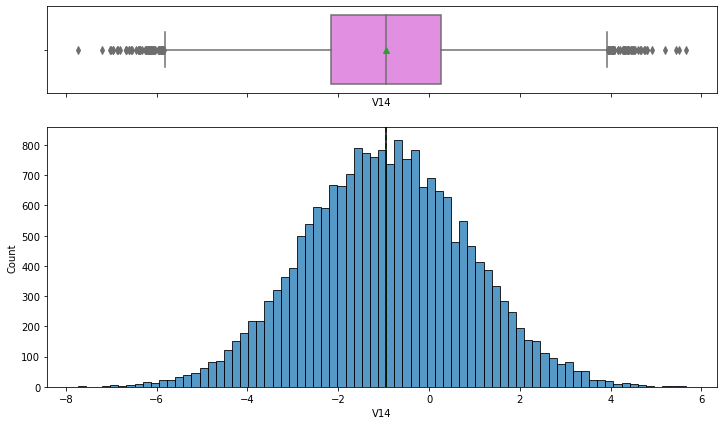

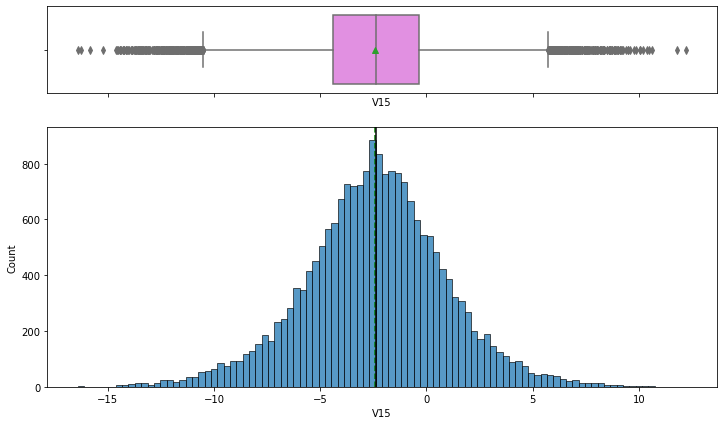

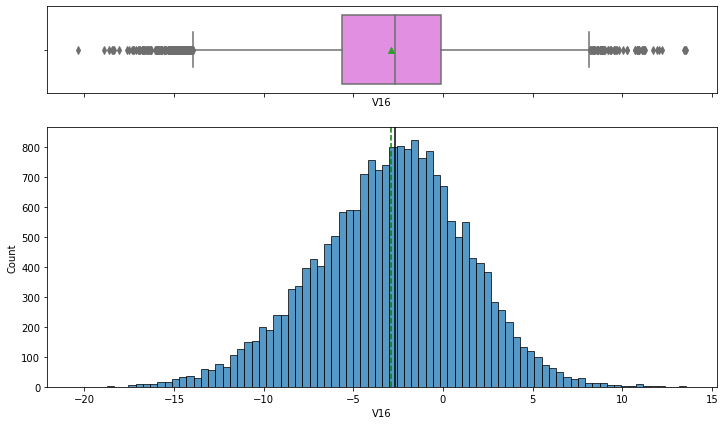

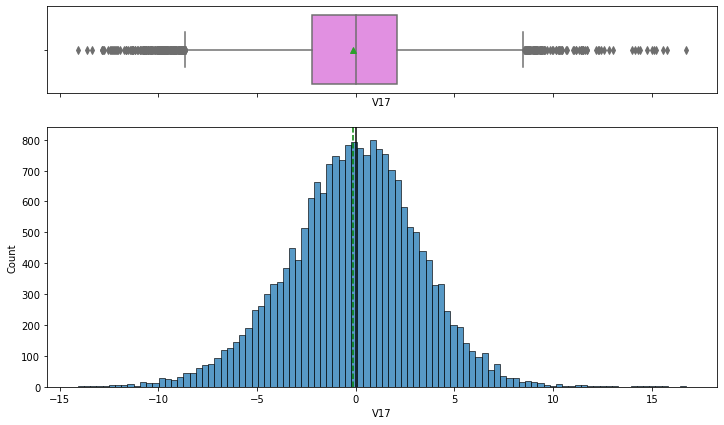

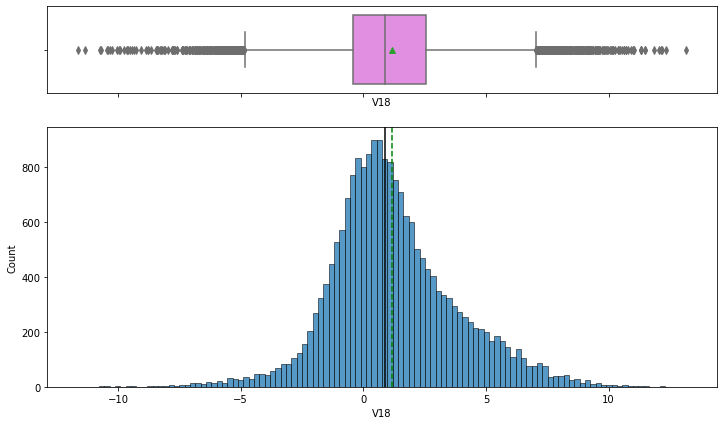

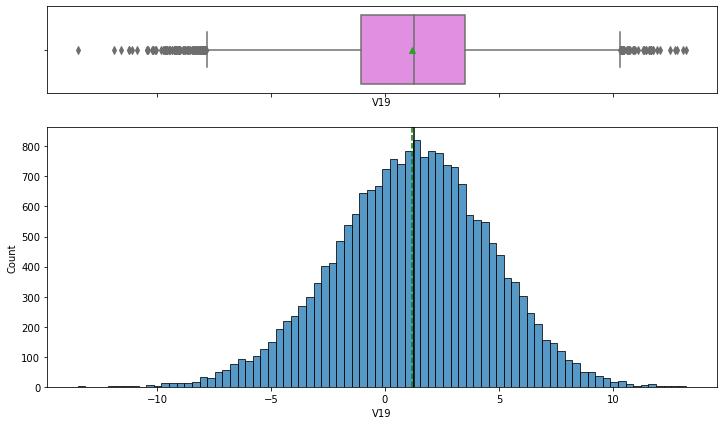

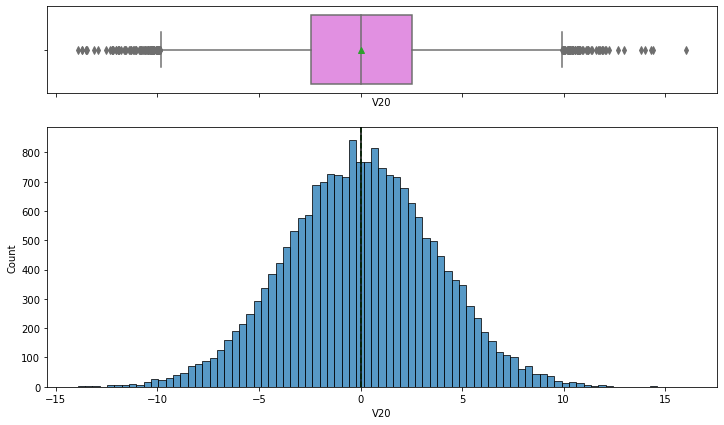

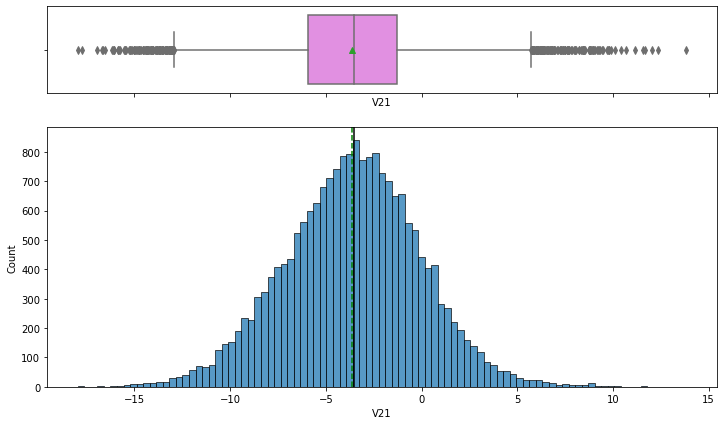

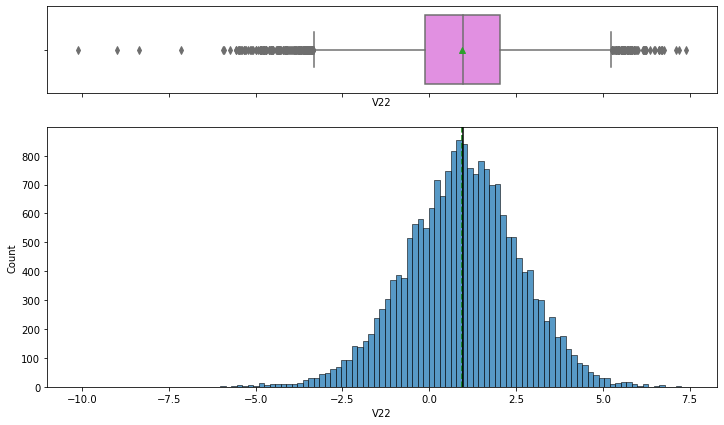

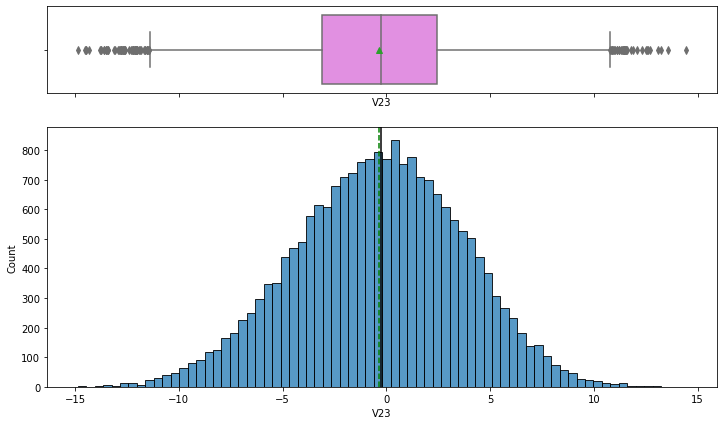

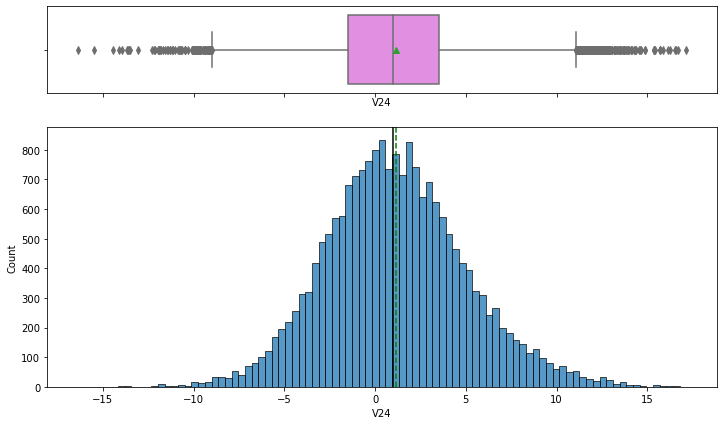

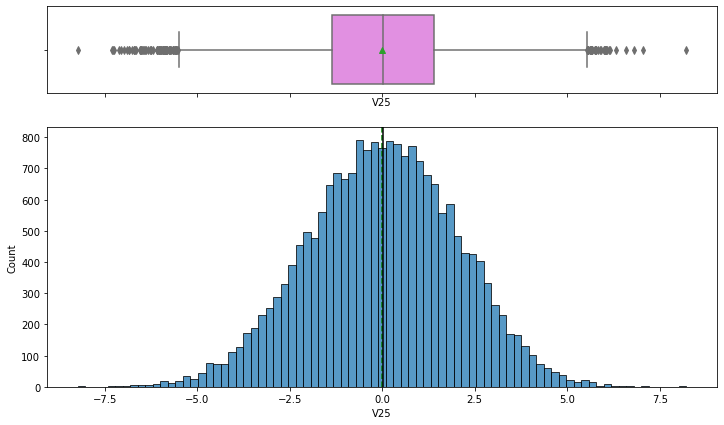

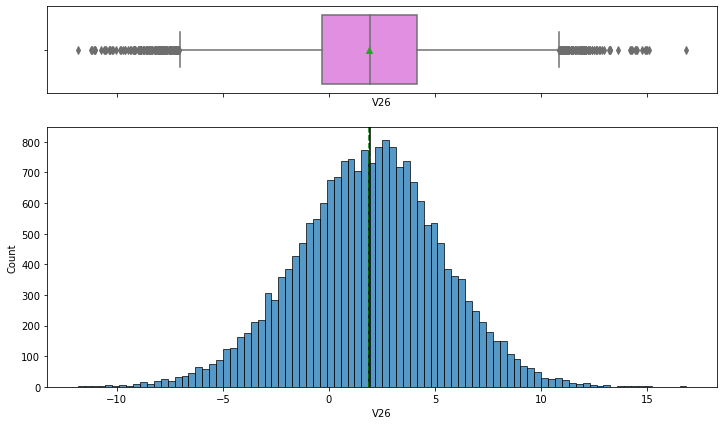

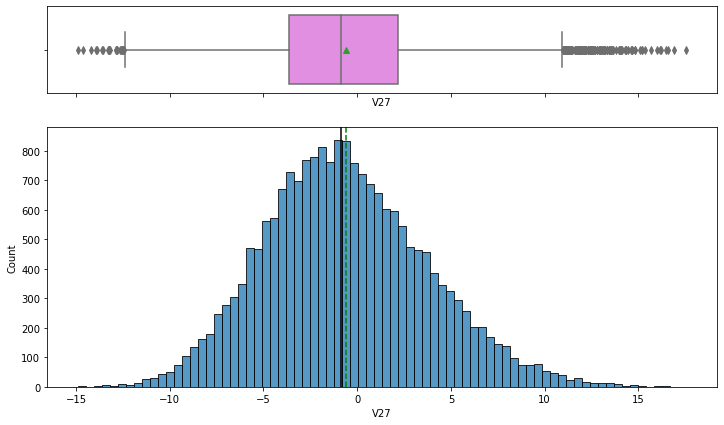

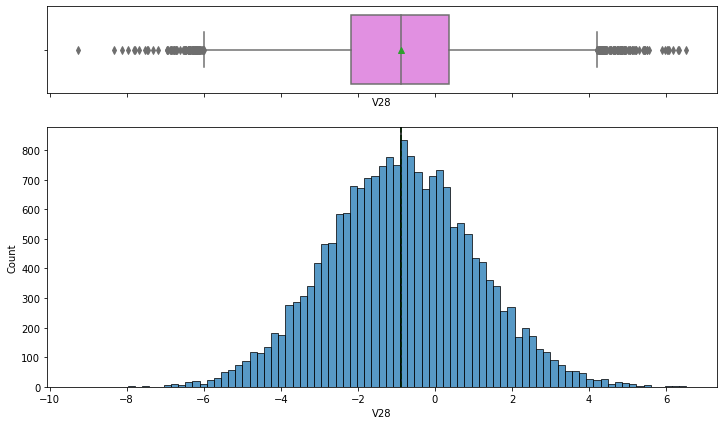

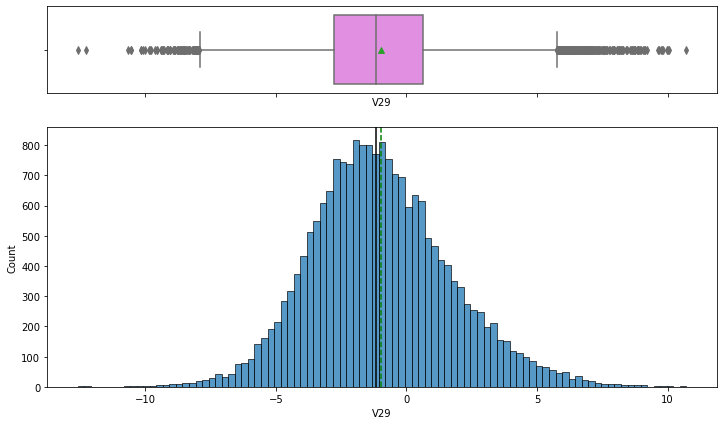

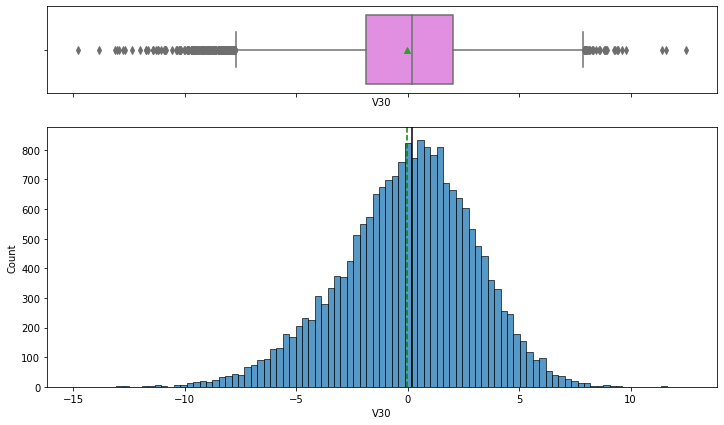

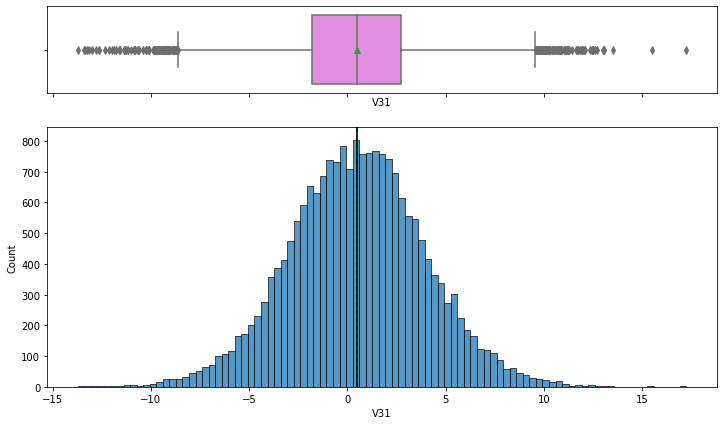

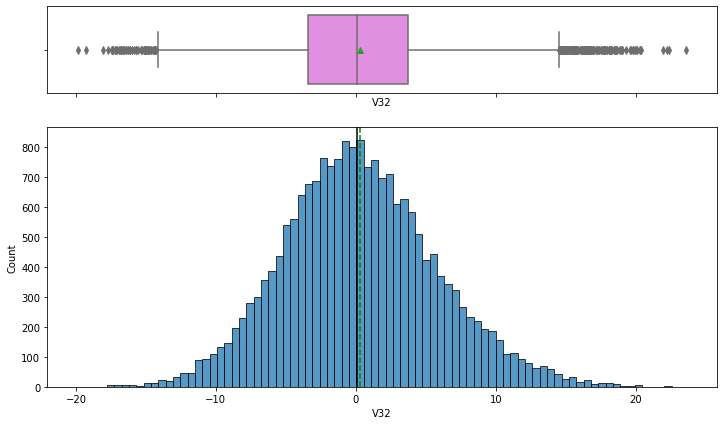

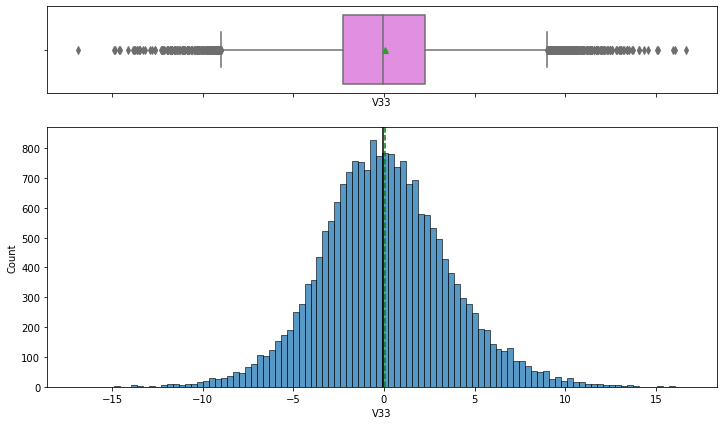

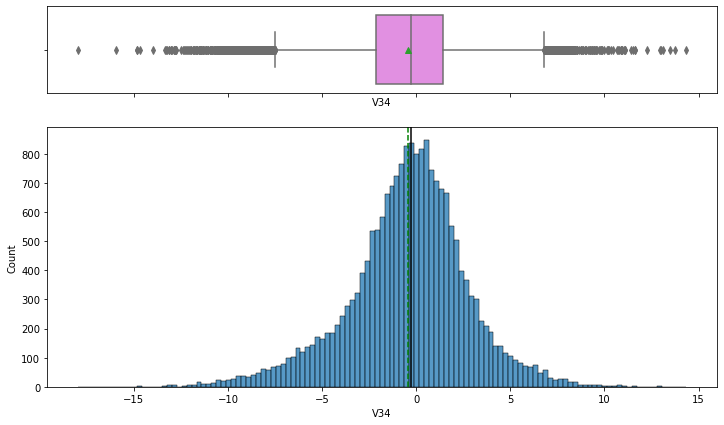

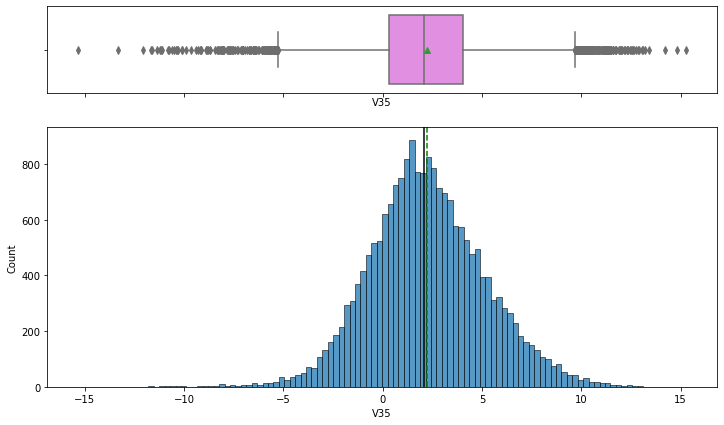

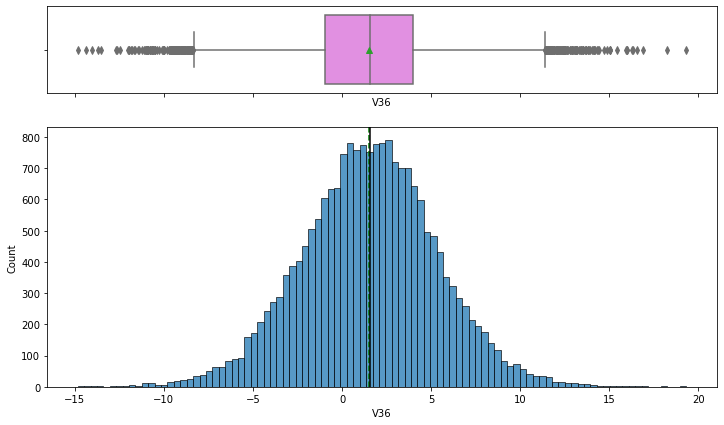

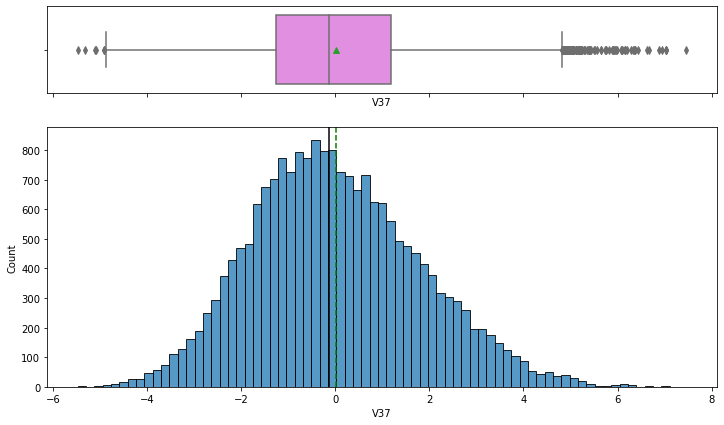

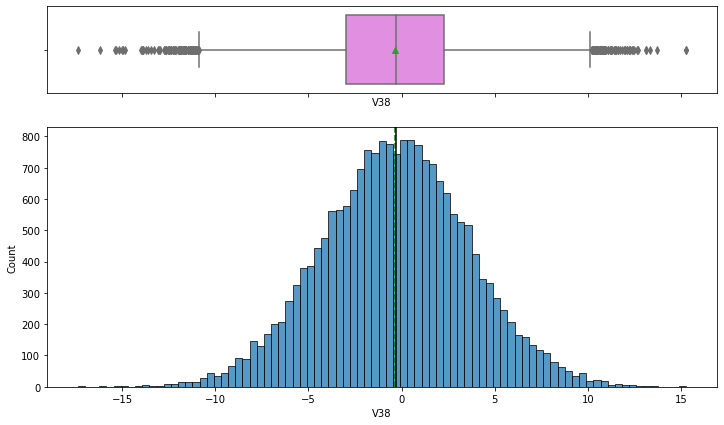

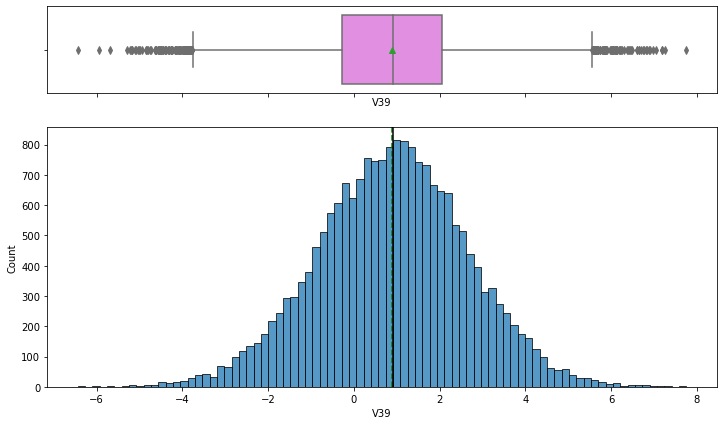

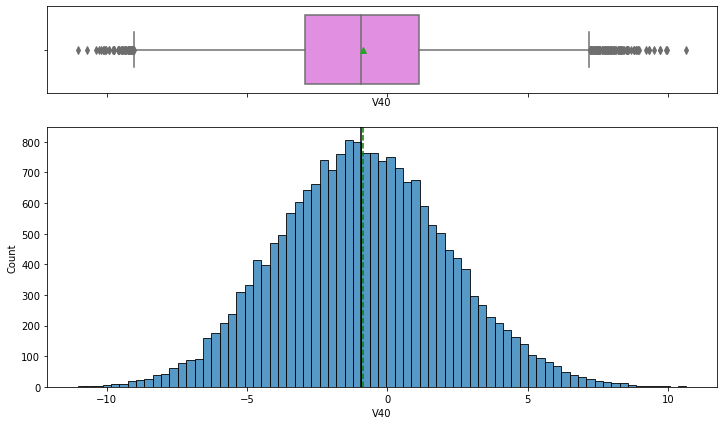

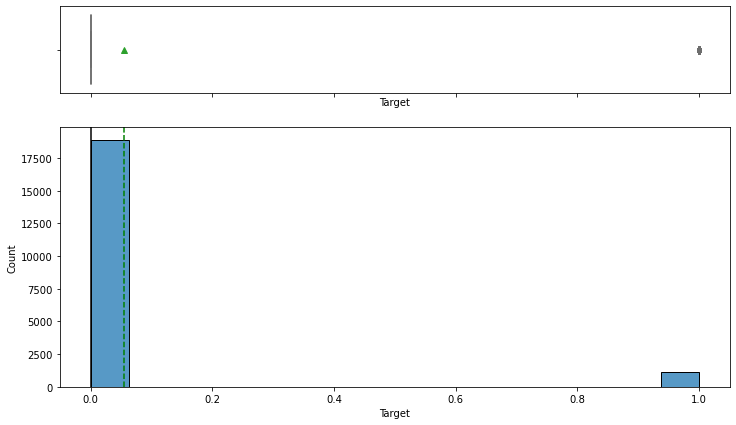

<IPython.core.display.Javascript object>

In [19]:
for feature in df.columns:
    histogram_boxplot(
        data, feature, figsize=(12, 7), kde=False, bins=None
    )  ## Please change the dataframe name as you define while reading the data

### Observations

* all independent variables follow a normal distribution bell curve
* almost all columns have outliers. These outliers will not be treated as they are part of valid readings of the sensors.
* mean and median values for most column is close if not same.
* data contains highly imbalance target class, mostly data from non-failed generators, which makes up 95% observations in train data
* lets explore it further


### Let's look at the values in target variable

In [20]:
## check the class distribution in target variable for train data
data["Target"].value_counts()

0    18890
1     1110
Name: Target, dtype: int64

<IPython.core.display.Javascript object>

### Observations

* In training data, Target class is unbalanced
* 94.5% of rows for “0 - No failure” class while only 5.5% rows for "1 - failure" class.

In [21]:
## check the class distribution in target variable for test data
data_test["Target"].value_counts()

0    4718
1     282
Name: Target, dtype: int64

<IPython.core.display.Javascript object>

### Observations

* In test data too, Target class is unbalanced 
* 94.4% of rows for “0 - No failure” class while only 5.6% rows for "1 - failure" class.

## Data Pre-processing

In [22]:
# Dividing data into X and y (Train data)
X = data.drop(["Target"], axis=1)
y = data["Target"]

# Dividing data into X and y (Test data)
X_test = data_test.drop(
    ["Target"], axis=1
)  ##  code to drop target variable from test data
y_test = data_test["Target"]  ##  code to store target variable in y_test

<IPython.core.display.Javascript object>

In [23]:
# Splitting data into training and validation set:
# we don't need to split the Train data into three way as Test data has been provided separately.

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.25, random_state=1, stratify=y
)  ## code to split the data into train test in the ratio 75:25

print(X_train.shape, X_val.shape, X_test.shape)

(15000, 40) (5000, 40) (5000, 40)


<IPython.core.display.Javascript object>

In [24]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 15000
Number of rows in validation data = 5000
Number of rows in test data = 5000


<IPython.core.display.Javascript object>

### Missing-Value Treatment

* We will use SimpleImputer using median value to impute missing values in V1 and V2 column.

In [25]:
# Let's impute the missing values
imp_mode = SimpleImputer(missing_values=np.nan, strategy="median")
cols_to_impute = ["V1", "V2"]

# fit and transform the imputer on train data
X_train[cols_to_impute] = imp_mode.fit_transform(X_train[cols_to_impute])

# Transform on validation and test data
X_val[cols_to_impute] = imp_mode.transform(X_val[cols_to_impute])

# fit and transform the imputer on test data
X_test[cols_to_impute] = imp_mode.transform(X_test[cols_to_impute])

<IPython.core.display.Javascript object>

In [26]:
# Checking that no column has missing values in train, validation or test sets
print(X_train.isna().sum())
print("-" * 30)

print(X_val.isna().sum())
print("-" * 30)

print(X_test.isna().sum())
print("-" * 30)


V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22

<IPython.core.display.Javascript object>

### Observations
* No missing values found after processing of the missing values.

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model. 
- False positives (FP) are failure detections in a generator where there is no failure.

### Which metric to optimize?

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [27]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [28]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Defining scorer to be used for cross-validation and hyperparameter tuning

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a **scorer** in cross-validation and hyperparameter tuning.

In [29]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

<IPython.core.display.Javascript object>

### Model Building with original data

Sample Decision Tree model building with original data 

In [30]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Cost:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance - Recall Score:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Cost:

Logistic regression: 0.4927566553639709
Bagging: 0.7210807301060529
Random forest: 0.7235192266070268
GBM: 0.7066661857008874
Adaboost: 0.6309140754635308
Xgboost: 0.7956208065796118
dtree: 0.6982829521679532

Validation Performance - Recall Score:

Logistic regression: 0.48201438848920863
Bagging: 0.7302158273381295
Random forest: 0.7266187050359713
GBM: 0.7230215827338129
Adaboost: 0.6762589928057554
Xgboost: 0.8201438848920863
dtree: 0.7050359712230215


<IPython.core.display.Javascript object>

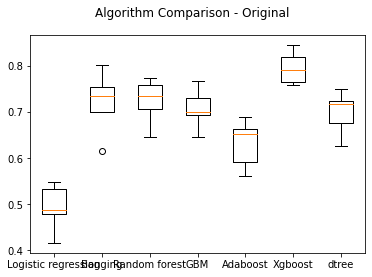

<IPython.core.display.Javascript object>

In [31]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure()

fig.suptitle("Algorithm Comparison - Original")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

### Model Building with Oversampled data


In [32]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_over == 0)))


print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, counts of label '1': 832
Before OverSampling, counts of label '0': 14168 

After OverSampling, counts of label '1': 14168
After OverSampling, counts of label '0': 14168 

After OverSampling, the shape of train_X: (28336, 40)
After OverSampling, the shape of train_y: (28336,) 



<IPython.core.display.Javascript object>

In [33]:
models_over = []  # Empty list to store all the models

# Appending models into the list
models_over.append(("Logistic regression", LogisticRegression(random_state=1)))
models_over.append(("Bagging", BaggingClassifier(random_state=1)))
models_over.append(("Random forest", RandomForestClassifier(random_state=1)))
models_over.append(("GBM", GradientBoostingClassifier(random_state=1)))
models_over.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models_over.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models_over.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1_over = []  # Empty list to store all model's CV scores
names_over = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Cost:" "\n")

for name, model in models_over:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result_over = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scorer, cv=kfold
    )
    results1_over.append(cv_result_over)
    names_over.append(name)
    print("{}: {}".format(name, cv_result_over.mean()))

print("\n" "Validation Performance - Recall Score:" "\n")

for name, model in models_over:
    model.fit(X_train_over, y_train_over)
    scores_over = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_over))


Cross-Validation Cost:

Logistic regression: 0.883963699328486
Bagging: 0.9762141471581656
Random forest: 0.9839075260047615
GBM: 0.9256068151319724
Adaboost: 0.8978689011775473
Xgboost: 0.989554053559209
dtree: 0.9720494245534969

Validation Performance - Recall Score:

Logistic regression: 0.8489208633093526
Bagging: 0.8345323741007195
Random forest: 0.8489208633093526
GBM: 0.8776978417266187
Adaboost: 0.8561151079136691
Xgboost: 0.8669064748201439
dtree: 0.7769784172661871


<IPython.core.display.Javascript object>

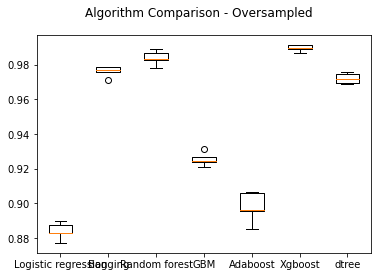

<IPython.core.display.Javascript object>

In [34]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure()

fig.suptitle("Algorithm Comparison - Oversampled")
ax = fig.add_subplot(111)

plt.boxplot(results1_over)
ax.set_xticklabels(names_over)

plt.show()

### Model Building with Undersampled data

In [35]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)


print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0)))


print("After UnderSampling, counts of label '1': {}".format(sum(y_train_un == 1)))
print("After UnderSampling, counts of label '0': {} \n".format(sum(y_train_un == 0)))


print("After UnderSampling, the shape of train_X: {}".format(X_train_un.shape))
print("After UnderSampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before UnderSampling, counts of label '1': 832
Before UnderSampling, counts of label '0': 14168 

After UnderSampling, counts of label '1': 832
After UnderSampling, counts of label '0': 832 

After UnderSampling, the shape of train_X: (1664, 40)
After UnderSampling, the shape of train_y: (1664,) 



<IPython.core.display.Javascript object>

In [36]:
models_under = []  # Empty list to store all the models

# Appending models into the list
models_under.append(("Logistic regression", LogisticRegression(random_state=1)))
models_under.append(("Bagging", BaggingClassifier(random_state=1)))
models_under.append(("Random forest", RandomForestClassifier(random_state=1)))
models_under.append(("GBM", GradientBoostingClassifier(random_state=1)))
models_under.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models_under.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models_under.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1_under = []  # Empty list to store all model's CV scores
names_under = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Cost:" "\n")

for name, model in models_under:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result_under = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scorer, cv=kfold
    )
    results1_under.append(cv_result_under)
    names_under.append(name)
    print("{}: {}".format(name, cv_result_under.mean()))

print("\n" "Validation Performance - Recall Score:" "\n")

for name, model in models_under:
    model.fit(X_train_un, y_train_un)
    scores_under = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_under))


Cross-Validation Cost:

Logistic regression: 0.8726138085275232
Bagging: 0.8641945025611427
Random forest: 0.9038669648654498
GBM: 0.8978572974532861
Adaboost: 0.8666113556020489
Xgboost: 0.9074742082100858
dtree: 0.8617776495202367

Validation Performance - Recall Score:

Logistic regression: 0.8525179856115108
Bagging: 0.8705035971223022
Random forest: 0.8920863309352518
GBM: 0.8884892086330936
Adaboost: 0.8489208633093526
Xgboost: 0.9028776978417267
dtree: 0.841726618705036


<IPython.core.display.Javascript object>

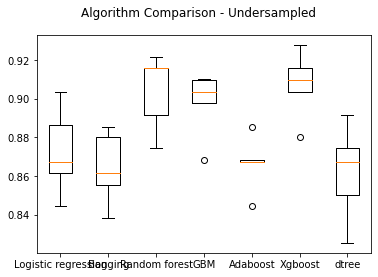

<IPython.core.display.Javascript object>

In [37]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure()

fig.suptitle("Algorithm Comparison - Undersampled")
ax = fig.add_subplot(111)

plt.boxplot(results1_under)
ax.set_xticklabels(names_under)

plt.show()

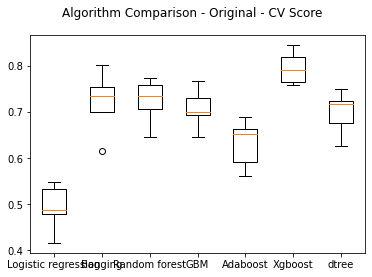

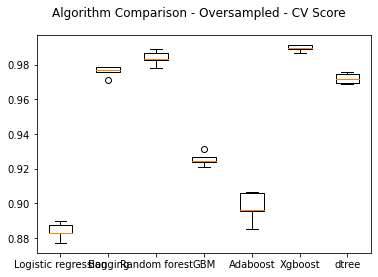

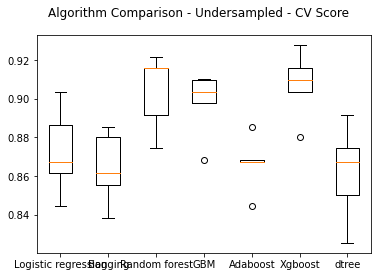

<IPython.core.display.Javascript object>

In [38]:
# Validation performance comparison

# Plotting boxplots for CV scores of all models defined above
fig = plt.figure()
fig.suptitle("Algorithm Comparison - Original - CV Score")
ax = fig.add_subplot(111)
plt.boxplot(results1)
ax.set_xticklabels(names)
plt.show()


fig = plt.figure()
fig.suptitle("Algorithm Comparison - Oversampled - CV Score")
ax = fig.add_subplot(111)
plt.boxplot(results1_over)
ax.set_xticklabels(names_over)
plt.show()

fig = plt.figure()
fig.suptitle("Algorithm Comparison - Undersampled - CV Score")
ax = fig.add_subplot(111)
plt.boxplot(results1_under)
ax.set_xticklabels(names_under)
plt.show()




### Observations
#### Select few models to further tune and improve
* After examining the cross validation score and recall value of 21 models, following models stand out.
** Random forest - original data (CV cost = 0.72, Recall = 0.72)
** Random forest - oversampled data (CV cost = 0.98, Recall = 0.84)
** Random forest - undersample data (CV cost = 0.90, Recall = 0.89)
** Xgboost - original data (CV cost = 0.79, Recall = 0.82)
** Decision tree - oversampled (CV cost = 0.97, Recall = 0.77)

* Why we choose these models?
* 1) Xgboost has performed the best in all three data sampling (original, undersampling and oversample), we believe we can * further improve it's performance
* 2) Random forest has performed the next best after Xgboost and has provided good results in all three data
* 3) Decision tree has also shown consistent performance and should be further tuned



## HyperparameterTuning 

### Sample Parameter Grids

**Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**

- For Gradient Boosting:

param_grid = {
    "n_estimators": np.arange(100,150,25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample":[0.5,0.7], 
    "max_features":[0.5,0.7]
}

- For Adaboost:

param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

- For Bagging Classifier:

param_grid = {
    'max_samples': [0.8,0.9,1], 
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

- For Random Forest:

param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

- For Decision Trees:

param_grid = {
    'max_depth': np.arange(2,6), 
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

- For Logistic Regression:

param_grid = {'C': np.arange(0.1,1.1,0.1)}

- For XGBoost:

param_grid={
    'n_estimators': [150, 200, 250],
    'scale_pos_weight': [5,10],
    'learning_rate': [0.1,0.2],
    'gamma': [0,3,5],
    'subsample': [0.8,0.9]
}

### Tuning Random forest using original data

In [39]:
%%time 

# defining model
Model_tun_rf_org = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)}


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model_tun_rf_org, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train) ## Complete the code to fit the model on under original data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 250, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.6996248466921577:
Wall time: 5min 58s


<IPython.core.display.Javascript object>

In [40]:
%%time 

# Creating new pipeline with best parameters
Model_tuned_rf_org = RandomForestClassifier(
    random_state=1,
    n_estimators=250,
    min_samples_leaf=1,
    max_samples=0.6,
    max_features="sqrt",
)

# Fit the model on training data
Model_tuned_rf_org.fit(X_train, y_train)

Wall time: 16 s


RandomForestClassifier(max_features='sqrt', max_samples=0.6, n_estimators=250,
                       random_state=1)

<IPython.core.display.Javascript object>

In [41]:
# Calculating different metrics on train set
rf_tuned_train_orig = model_performance_classification_sklearn(
    Model_tuned_rf_org, X_train, y_train
)
print("Training performance - Random Forest tuned on Original:")
rf_tuned_train_orig

Training performance - Random Forest tuned on Original:


,Accuracy,Recall,Precision,F1
0,0.995,0.909,1.000,0.952


<IPython.core.display.Javascript object>

In [42]:
# Calculating different metrics on validation set
rf_tuned_val_orig = model_performance_classification_sklearn(
    Model_tuned_rf_org, X_val, y_val
)
print("Validation performance - Random Forest tuned on Original:")
rf_tuned_val_orig

Validation performance - Random Forest tuned on Original:


,Accuracy,Recall,Precision,F1
0,0.983,0.712,0.985,0.827


<IPython.core.display.Javascript object>

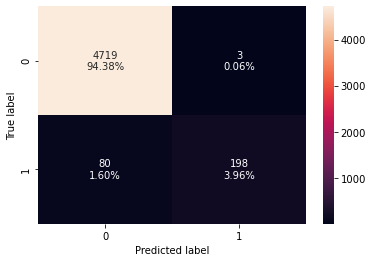

<IPython.core.display.Javascript object>

In [43]:
# creating confusion matrix
confusion_matrix_sklearn(Model_tuned_rf_org, X_val, y_val)

### Tuning Random forest using Oversample data

In [44]:
%%time 

# defining model
Model_tun_rf_over = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)}


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model_tun_rf_over, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over) ## Complete the code to fit the model on under sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 200, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.9818606498020482:
Wall time: 8min 51s


<IPython.core.display.Javascript object>

In [45]:
%%time 

# Creating new pipeline with best parameters
Model_tuned_rf_over = RandomForestClassifier(
    random_state=1,
    n_estimators=200,
    min_samples_leaf=1,
    max_samples=0.6,
    max_features="sqrt",
)

# Fit the model on training data
Model_tuned_rf_over.fit(X_train_over, y_train_over)

Wall time: 17.3 s


RandomForestClassifier(max_features='sqrt', max_samples=0.6, n_estimators=200,
                       random_state=1)

<IPython.core.display.Javascript object>

In [46]:
# Calculating different metrics on train set
rf_tuned_train_over = model_performance_classification_sklearn(
    Model_tuned_rf_over, X_train_over, y_train_over
)
print("Training performance - Random Forest tuned on Oversample:")
rf_tuned_train_over

Training performance - Random Forest tuned on Oversample:


,Accuracy,Recall,Precision,F1
0,1.000,0.999,1.000,1.000


<IPython.core.display.Javascript object>

In [47]:
# Calculating different metrics on validation set
rf_tuned_val_over = model_performance_classification_sklearn(
    Model_tuned_rf_over, X_val, y_val
)
print("Validation performance - Random Forest tuned on Oversample:")
rf_tuned_val_over

Validation performance - Random Forest tuned on Oversample:


,Accuracy,Recall,Precision,F1
0,0.988,0.863,0.920,0.891


<IPython.core.display.Javascript object>

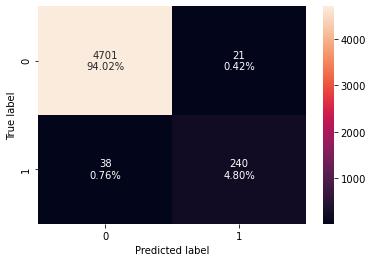

<IPython.core.display.Javascript object>

In [48]:
# creating confusion matrix
confusion_matrix_sklearn(Model_tuned_rf_over, X_val, y_val)

### Tuning Random forest using Undersample data

In [49]:
%%time 

# defining model
Model_tun_rf_under= RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)}


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model_tun_rf_under, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un) ## Complete the code to fit the model on under sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 300, 'min_samples_leaf': 2, 'max_samples': 0.5, 'max_features': 'sqrt'} with CV score=0.8990116153235697:
Wall time: 28.8 s


<IPython.core.display.Javascript object>

In [50]:
%%time 

# Creating new pipeline with best parameters
Model_tuned_rf_under = RandomForestClassifier(
    random_state=1,
    n_estimators=300,
    min_samples_leaf=2,
    max_samples=0.5,
    max_features="sqrt",
)

# Fit the model on training data
Model_tuned_rf_under.fit(X_train_un, y_train_un)

Wall time: 1.11 s


RandomForestClassifier(max_features='sqrt', max_samples=0.5, min_samples_leaf=2,
                       n_estimators=300, random_state=1)

<IPython.core.display.Javascript object>

In [51]:
# Calculating different metrics on train set
rf_tuned_train_under = model_performance_classification_sklearn(
    Model_tuned_rf_under, X_train_un, y_train_un
)
print("Training performance - Random Forest tuned on Undersample:")
rf_tuned_train_under

Training performance - Random Forest tuned on Undersample:


,Accuracy,Recall,Precision,F1
0,0.961,0.933,0.989,0.960


<IPython.core.display.Javascript object>

In [52]:
# Calculating different metrics on validation set
rf_tuned_val_under = model_performance_classification_sklearn(
    Model_tuned_rf_under, X_val, y_val
)
print("Validation performance - Random Forest tuned on Undersample:")
rf_tuned_val_under

Validation performance - Random Forest tuned on Undersample:


,Accuracy,Recall,Precision,F1
0,0.938,0.885,0.468,0.612


<IPython.core.display.Javascript object>

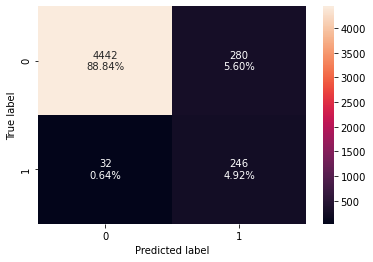

<IPython.core.display.Javascript object>

In [53]:
# creating confusion matrix
confusion_matrix_sklearn(Model_tuned_rf_under, X_val, y_val)

### Tuning Decision tree with oversampled data

In [54]:
%%time 

# defining model
Model_tun_dt_over = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "max_depth": np.arange(2, 6),
    "min_samples_leaf": [1, 4, 7],
    "max_leaf_nodes": [10, 15],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model_tun_dt_over,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 15, 'max_depth': 3} with CV score=0.9102913265648006:
Wall time: 5.42 s


<IPython.core.display.Javascript object>

In [55]:
# Creating new pipeline with best parameters
Model_tuned_dt_over = DecisionTreeClassifier(
    random_state=1,
    min_samples_leaf=7,
    min_impurity_decrease=0.001,
    max_leaf_nodes=15,
    max_depth=3,
)

# Fit the model on training data
Model_tuned_dt_over.fit(X_train_over, y_train_over)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=15,
                       min_impurity_decrease=0.001, min_samples_leaf=7,
                       random_state=1)

<IPython.core.display.Javascript object>

In [56]:
# Calculating different metrics on train set
dtree_tuned_train_over = model_performance_classification_sklearn(
    Model_tuned_dt_over, X_train_over, y_train_over
)
print("Training performance - Decision Tree tuned on Oversample:")
dtree_tuned_train_over

Training performance - Decision Tree tuned on Oversample:


,Accuracy,Recall,Precision,F1
0,0.843,0.917,0.799,0.854


<IPython.core.display.Javascript object>

In [57]:
# Calculating different metrics on validation set
dtree_tuned_val_over = model_performance_classification_sklearn(
    Model_tuned_dt_over, X_val, y_val
)
print("Validation performance - Decision Tree tuned on Oversample:")
dtree_tuned_val_over

Validation performance - Decision Tree tuned on Oversample:


,Accuracy,Recall,Precision,F1
0,0.763,0.885,0.176,0.294


<IPython.core.display.Javascript object>

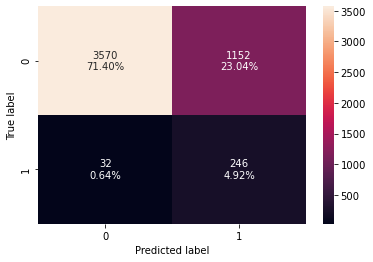

<IPython.core.display.Javascript object>

In [58]:
# creating confusion matrix
confusion_matrix_sklearn(Model_tuned_dt_over, X_val, y_val)

### Tuning XGBoost using Original data

In [59]:
%%time 

# defining model
Model_tun_XGB_org = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':[150,200,250],'scale_pos_weight':[5,10], 'learning_rate':[0.1,0.2], 'gamma':[0,3,5], 'subsample':[0.8,0.9]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model_tun_XGB_org, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train) ## Complete the code to fit the model on over original data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.8, 'scale_pos_weight': 10, 'n_estimators': 250, 'learning_rate': 0.1, 'gamma': 3} with CV score=0.858206478609047:
Wall time: 26min 34s


<IPython.core.display.Javascript object>

In [60]:
%%time 

# building model with best parameters
Model_tuned_XGB_org = XGBClassifier(
    random_state=1,
    n_estimators=250,
    scale_pos_weight=10,
    subsample=0.8,
    learning_rate=0.01,
    gamma=3,
    eval_metric="logloss",
  )

# Fit the model on training data
Model_tuned_XGB_org.fit(X_train, y_train)

Wall time: 9.98 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=3, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=250, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=10, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [61]:
# Calculating different metrics on train set
XGB_tuned_train_orig = model_performance_classification_sklearn(
    Model_tuned_XGB_org, X_train, y_train
)
print("Training performance - XGBoost tuned on Original:")
XGB_tuned_train_orig

Training performance - XGBoost tuned on Original:


,Accuracy,Recall,Precision,F1
0,0.991,0.919,0.913,0.916


<IPython.core.display.Javascript object>

In [62]:
# Calculating different metrics on validation set
XGB_tuned_val_orig = model_performance_classification_sklearn(
    Model_tuned_XGB_org, X_val, y_val
)
print("Validation performance - XGBoost tuned on Original:")
XGB_tuned_val_orig

Validation performance - XGBoost tuned on Original:


,Accuracy,Recall,Precision,F1
0,0.983,0.845,0.845,0.845


<IPython.core.display.Javascript object>

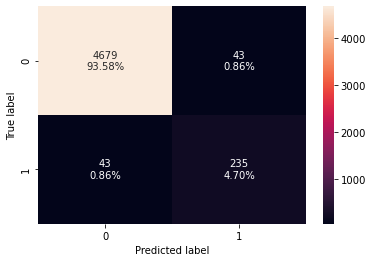

<IPython.core.display.Javascript object>

In [63]:
# creating confusion matrix
confusion_matrix_sklearn(Model_tuned_XGB_org, X_val, y_val)

## Model performance comparison and choosing the final model

In [64]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        rf_tuned_train_orig.T,
        rf_tuned_train_over.T,
        rf_tuned_train_under.T,
        dtree_tuned_train_over.T,
        XGB_tuned_train_orig.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Random Forest tuned on Original",
    "Random Forest tuned on Oversample",
    "Random Forest tuned on Undersample",
    "Decision Tree tuned on Oversample",
    "XGBoost Tuned on Original",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Random Forest tuned on Original,Random Forest tuned on Oversample,Random Forest tuned on Undersample,Decision Tree tuned on Oversample,XGBoost Tuned on Original
Accuracy,0.995,1.000,0.961,0.843,0.991
Recall,0.909,0.999,0.933,0.917,0.919
Precision,1.000,1.000,0.989,0.799,0.913
F1,0.952,1.000,0.960,0.854,0.916


<IPython.core.display.Javascript object>

In [65]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [
        rf_tuned_val_orig.T,
        rf_tuned_val_over.T,
        rf_tuned_val_under.T,
        dtree_tuned_val_over.T,
        XGB_tuned_val_orig.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Random Forest tuned on Original",
    "Random Forest tuned on Oversample",
    "Random Forest tuned on Undersample",
    "Decision Tree tuned on Oversample",
    "XGBoost Tuned on Original",
]
print("Training performance comparison:")
models_val_comp_df

Training performance comparison:


,Random Forest tuned on Original,Random Forest tuned on Oversample,Random Forest tuned on Undersample,Decision Tree tuned on Oversample,XGBoost Tuned on Original
Accuracy,0.983,0.988,0.938,0.763,0.983
Recall,0.712,0.863,0.885,0.885,0.845
Precision,0.985,0.920,0.468,0.176,0.845
F1,0.827,0.891,0.612,0.294,0.845


<IPython.core.display.Javascript object>

- We can see that Random Forest Tuned on Undersample is giving generalized performance on Test and Validation set with Recall score of 93.3% and 88.5% respectively.
- Let's see the feature importance from the Random Forest model tuned with RandomSearchCV with undersampling.

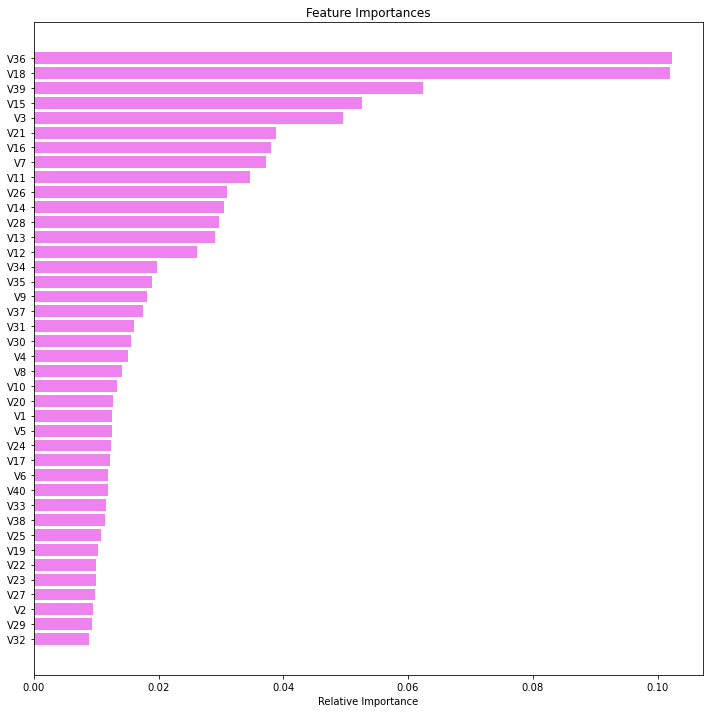

<IPython.core.display.Javascript object>

In [66]:
feature_names = X_train.columns
importances = Model_tuned_rf_under.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- V36 and V18 are the two most important variables followed by next three variables V39, V15 amd V3


### Test set final performance

In [67]:
# Let's check the performance on test set
Model_test = model_performance_classification_sklearn(
    Model_tuned_rf_under, X_test, y_test
)
Model_test

,Accuracy,Recall,Precision,F1
0,0.944,0.879,0.500,0.638


<IPython.core.display.Javascript object>

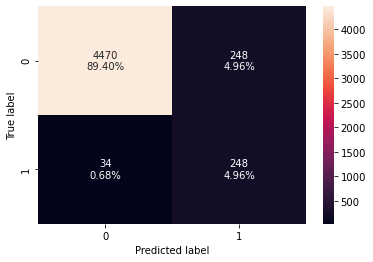

<IPython.core.display.Javascript object>

In [68]:
# creating confusion matrix
confusion_matrix_sklearn(Model_tuned_rf_under, X_test, y_test)

- We recommend final model to be Model_tuned_rf_under (Random Forest tuned on Undersample data)
- This model has performed well with high Recall score on all three sets of data, training, validation and test
- This model gives a generalized performance on unseen data and is able to predict failure with 94.4% accruacy and ~88% recall score



## Pipelines to build the final model


* Since we have only one datatype in the data, we don't need to use column transformer here

In [69]:
# creating a list of numerical variables
numerical_features = [
    "V1",
    "V2",
    "V3",
    "V4",
    "V5",
    "V6",
    "V7",
    "V8",
    "V9",
    "V10",
    "V11",
    "V12",
    "V13",
    "V14",
    "V15",
    "V16",
    "V17",
    "V18",
    "V19",
    "V20",
    "V21",
    "V22",
    "V23",
    "V24",
    "V25",
    "V26",
    "V27",
    "V28",
    "V29",
    "V30",
    "V31",
    "V32",
    "V33",
    "V34",
    "V35",
    "V36",
    "V37",
    "V38",
    "V39",
    "V40"]


# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])

preprocessor = ColumnTransformer(
    transformers=[("num", numeric_transformer, numerical_features),],
    remainder="passthrough",
)



<IPython.core.display.Javascript object>

In [70]:
# Separating target variable and other variables
X1 = df.drop(columns="Target", axis=1)
Y1 = df["Target"]

# Since we already have a separate test set, we don't need to divide data into train and test

X_test1 = df_test.drop(columns="Target", axis=1) ##  code to drop target variable from test data
y_test1 = df_test["Target"] ##  code to store target variable in y_test1


<IPython.core.display.Javascript object>

In [71]:
# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "RFC",
            RandomForestClassifier(
                random_state=1,
                n_estimators=300,
                min_samples_leaf=2,
                max_samples=0.5,
                max_features="sqrt",
            ),
        ),
    ]
)


<IPython.core.display.Javascript object>

In [72]:
# We can't oversample data without doing missing value treatment, so let's first treat the missing values in the train set
imputer = SimpleImputer(strategy="median")
X1[numerical_features] = imputer.fit_transform(X1[numerical_features])


# We don't need to impute missing values in test set as it will be done inside pipeline

<IPython.core.display.Javascript object>

In [73]:
# Random Under Sampling Technique
rus1 = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_un1, y_un1 = rus1.fit_resample(X1, Y1)


<IPython.core.display.Javascript object>

In [74]:
model.fit(X_un1, y_un1)  ##  code to fit the Model obtained from above step

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['V1', 'V2', 'V3', 'V4', 'V5',
                                                   'V6', 'V7', 'V8', 'V9',
                                                   'V10', 'V11', 'V12', 'V13',
                                                   'V14', 'V15', 'V16', 'V17',
                                                   'V18', 'V19', 'V20', 'V21',
                                                   'V22', 'V23', 'V24', 'V25',
                                                   'V26', 'V27', 'V28', 'V29',
                                                   'V30', ...])])),
                ('RFC',
                 RandomForestClass

<IPython.core.display.Javascript object>

In [75]:
Model_test = model_performance_classification_sklearn(
    model, X_test1, y_test1
)  ## Complete the code to check the performance on test set
Model_test

,Accuracy,Recall,Precision,F1
0,0.945,0.872,0.507,0.641


<IPython.core.display.Javascript object>

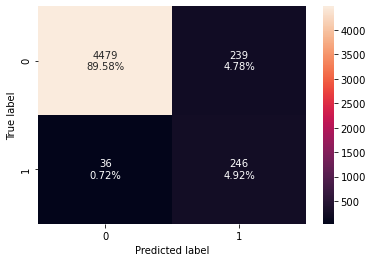

<IPython.core.display.Javascript object>

In [76]:
# creating confusion matrix
confusion_matrix_sklearn(model, X_test1, y_test1)

# Business Insights and Conclusions

- We recommend ReneWind to implement RandomForestClassifier with undersampling to proactively identify the failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost
- Recommended model provides generalized performance with 95% accuracy and 87% recall on unseen data
- In the test data supplied, the following predictions were made by the classification model:
-- 87% True positives (TP) (failures) correctly predicted by the model. These will result in repair costs.
-- 0.72% False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
-- 4.78% False positives (FP) are detections where there is no failure. These will result in inspection costs.
- Company should closely monitor V36 and V18 sensors as these are the most important variables followed by the next three variables V39, V15, and V3 in predicting the failures.
- Once the model has been placed, the model should be periodically monitored and trained using the new data to keep it learning from new patterns
- Due to the fact these generators are expensive machines, their health (failure) shouldn't be monitored using just this predictive model, other methods of monitoring should also be used as a fail-safe method.



***